In [1]:
#pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [3]:
data = pd.read_csv("/home/exouser/energydata_complete.csv")

In [4]:
data['date'] = pd.to_datetime(data['date'])

In [5]:
print(data.dtypes)

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object


In [6]:
print (data.head())

                 date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdew

Q1. Plot the Appliances Energy Consumption for the Whole Period

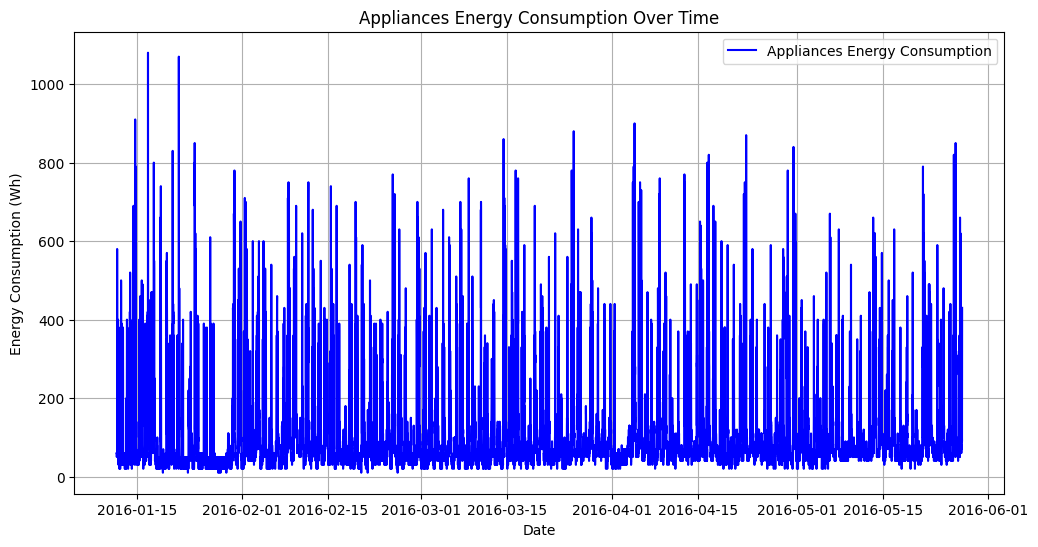

In [7]:
#Energy consumption over the entire period
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['Appliances'], label='Appliances Energy Consumption', color='blue')
plt.xlabel("Date")
plt.ylabel("Energy Consumption (Wh)")
plt.title("Appliances Energy Consumption Over Time")
plt.legend()
plt.grid(True)
plt.savefig("Appliances Energy Consumption over time.png", dpi=300, bbox_inches="tight")
plt.show()

Q2. Hourly Consumption of Appliances for a week

In [8]:
#One week Heatmap of consumption
one_week_data = data[(data['date'] >= '2016-03-01') & (data['date']<= '2016-03-07')]

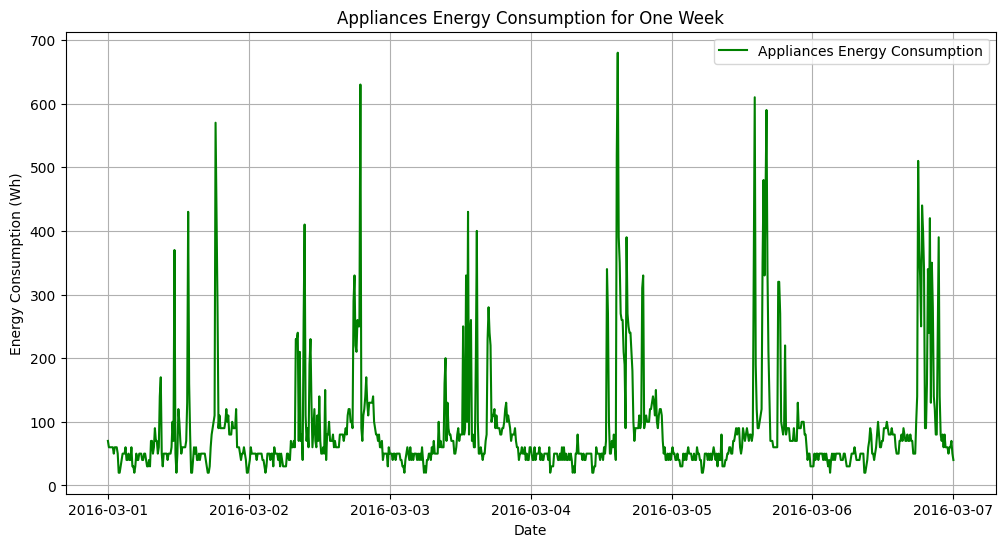

In [9]:
#plotting
plt.figure(figsize=(12, 6))
plt.plot(one_week_data['date'], one_week_data['Appliances'], label='Appliances Energy Consumption', color='green')

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) #format as YYYY-MM-DD
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7)) #show label every seven days
#plt.gcf().autofmt_xdate() #Rodate date labels for readability


plt.xlabel("Date")
plt.ylabel("Energy Consumption (Wh)")
plt.title("Appliances Energy Consumption for One Week")
plt.legend()
plt.grid(True)
plt.savefig("Appliances Enegry Consumption for one week.png", dpi=300, bbox_inches="tight")
plt.show()

In [14]:
#Heatmap
one_week_data.loc[:, 'hour'] = one_week_data['date'].dt.hour
one_week_data.loc[:, 'day'] = one_week_data['date'].dt.day_name()

In [15]:
#Pivot the data for the heatmap
heatmap_data = one_week_data.pivot_table(index='hour',columns='day', values='Appliances', aggfunc='mean')

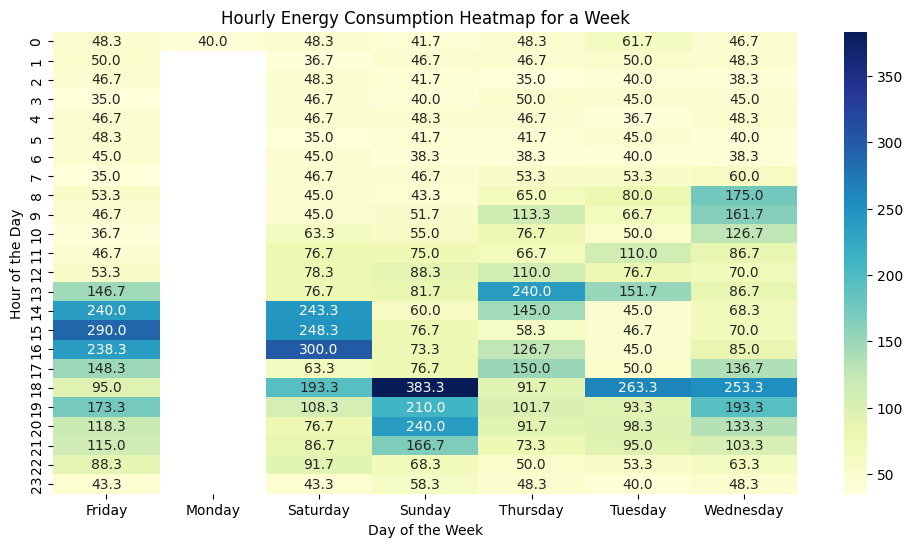

In [23]:
#Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.title("Hourly Energy Consumption Heatmap for a Week")
plt.savefig("Hourly energy consump heatmap for a week.png", dpi=300, bbox_inches="tight")
plt.show()

Q3. Histogram of Energy Consumption of Appliances

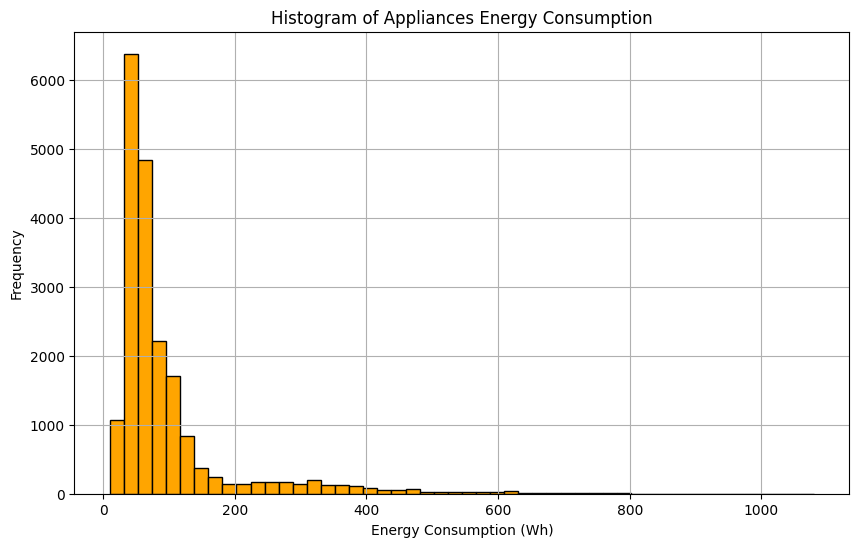

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(data['Appliances'],bins=50, color='orange', edgecolor='black')
plt.xlabel("Energy Consumption (Wh)")
plt.ylabel("Frequency")
plt.title("Histogram of Appliances Energy Consumption")
plt.grid(True)
plt.savefig("Histogram of Appliances energy consumption.png", dpi=300, bbox_inches="tight")
plt.show()

Q4. Construct Feature VAriable NSM and Plot Energy Consumption vs. NSM

In [19]:
#Calc NSM (Number of seconds from midnight)
data['NSM'] = data['date'].dt.hour*3600 + data['date'].dt.minute*60+ data['date'].dt.second

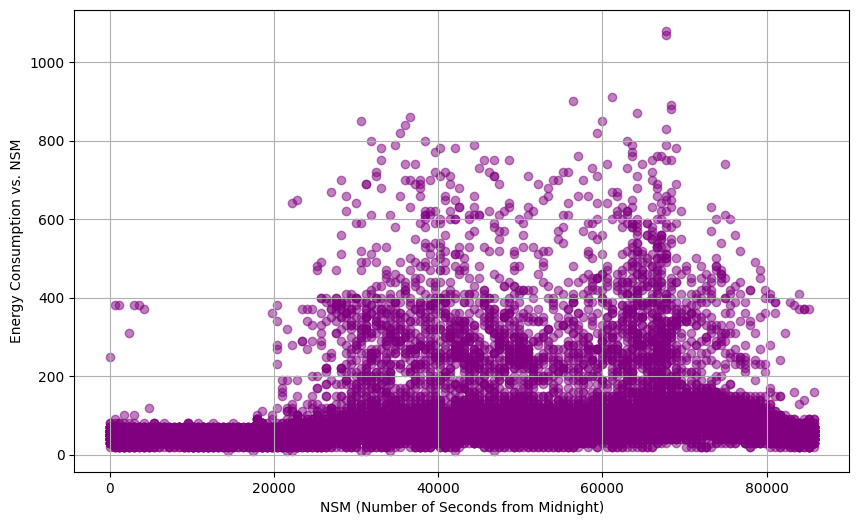

In [20]:
#plot energy cons. vs NSM
plt.figure(figsize=(10, 6))
plt.scatter(data['NSM'], data['Appliances'], alpha=0.5, color='purple')
plt.xlabel("NSM (Number of Seconds from Midnight)")
plt.ylabel("Energy Consumption vs. NSM")
plt.savefig("Energy consumption v NSM.png", dpi=300, bbox_inches="tight")
plt.grid(True)
plt.show()

Comment: The plot of Energy Consumption vs NSM as shown above reflects the daily routines and environmental conditions of the experimental data collected from regions within the energy-efficient building near Chievres Airport, Belgium. The observed peaks in energy cnsumption during morning and evening hours likely correspond to typical human activity patterns in the area, while the influence of location weather data (e.g., temperature and pressure from Chievres Airport) may further modluatethese patterns, highlighting the interplay between time-of-day and external environmental factors on energy usage.

Q5. Appliances Energy consumption vs. Press_mm_Hg

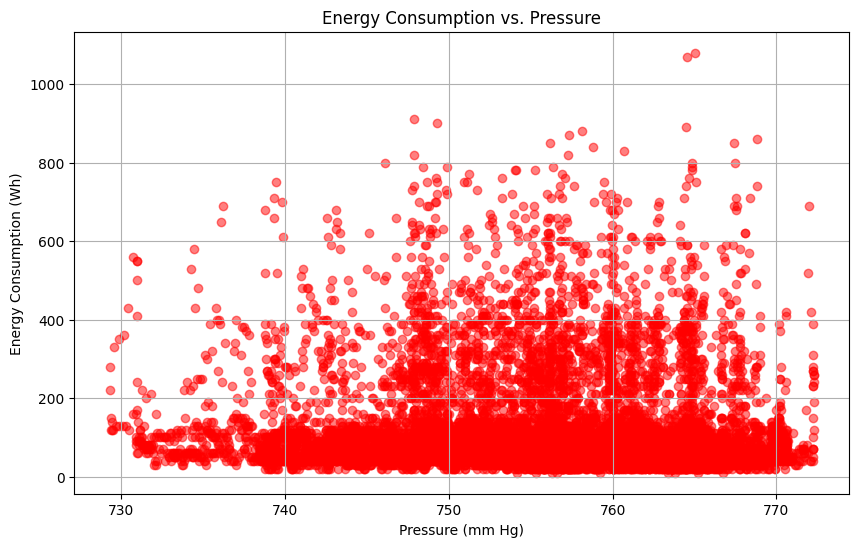

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Press_mm_hg'], data['Appliances'], alpha=0.5, color='red')
plt.xlabel("Pressure (mm Hg)")
plt.ylabel("Energy Consumption (Wh)")
plt.title("Energy Consumption vs. Pressure")
plt.grid(True)
plt.savefig("Energy consumption v pressure.png", dpi=300, bbox_inches="tight")
plt.show()

The energy consumption vs pressure plot indicates that the experimental procedure involved varying pressure levels, primarily within the 740 - 770 mm Hg range, where lower pressures contributed significantly to energy consumption. This suggests a strong dependence of energy demand on pressure fluctuations around that region.